# Exercise 1: Plotting functions

Consider the following function in one variable $x$, 
$$
f(x) = \sin(20 x) + 5 x^2
$$
which is the sum of the sine function and a quadratic function.

Perform the following tasks:

1.  Define a Python function that returns the function value $f(x)$ for some 
    argument $x$. The function should work with both scalar numbers and 
    NumPy arrays.

    *Hint:* The sine function is implemented in 
    [`np.sin()`](https://numpy.org/doc/stable/reference/generated/numpy.sin.html).

2.  Evaluate the function on a uniformly spaced grid of $x$-values
    on the interval $[-1, 1]$ using 51 grid points.

    Create a plot depicting the function on this interval. Set the
    $x$-ticks to the values $[-1, 0, 1]$ and add a legend.

3.  Locate the point $x_{min}$ where the function attains its minimum on the grid 
    you created and print the values $(x_{min}, f(x_{min}))$.

    *Hint:* You can use the NumPy function 
    [`np.argmin()`](https://numpy.org/doc/stable/reference/generated/numpy.argmin.html) for this.

4.  Augment the plot you created earlier with a horizontal and vertical
    line indicating where the minimum is located. Add a black dot at the point $(x_{min}, f(x_{min}))$.

    *Hint:* Horizontal and vertical lines can be added with 
    [`axhline()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline.html)
    and 
    [`axvline()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html).
    A single dot can be added in various ways, e.g., using 
    [`scatter()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html).

5.  Repeat the exercise but now use $N=501$ grid points to evaluate the function.

## Solution

#### Part 1: Defining the function

We implement the function using `np.sin()` so that it supports both scalar and array arguments.

In [1]:
import numpy as np

def fcn(x):
    """
    Function to compute f(x) = sin(20x) + 5x^2
    """
    return np.sin(20*x) + 5 * x**2.0

#### Part 2: Evaluating and plotting the function

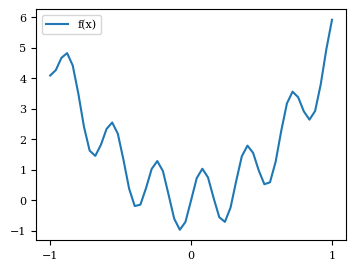

In [2]:
import matplotlib.pyplot as plt

N = 51
xvalues = np.linspace(-1, 1, N)
yvalues = fcn(xvalues)

plt.plot(xvalues, yvalues, label='f(x)')
plt.xticks((-1, 0, 1))
plt.legend()

#### Part 3: Locating the minimum

In [3]:
# Locate the index of the minimum value
imin = np.argmin(yvalues)

# Extract the x and y values at the minimum
xmin = xvalues[imin]
ymin = yvalues[imin]

print(f"Minimum at x = {xmin:.3f}, f(x) = {ymin:.3f}")

Minimum at x = -0.080, f(x) = -0.968


#### Part 4: Visualizing the minimum

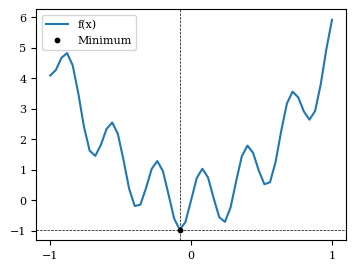

In [4]:
plt.plot(xvalues, yvalues, label="f(x)")

# Add dashed lines to indicate the minimum
plt.axvline(xmin, color="black", ls="--", lw=0.5)
plt.axhline(ymin, color="black", ls="--", lw=0.5)

# Add a black point to highlight the minimum
plt.scatter(xmin, ymin, color="black", label="Minimum", s=10, zorder=10)
plt.xticks((-1, 0, 1))
plt.legend()

#### Part 5: Increasing the grid size

We re-run the above code but increase the grid size to $N=501$. As you can see, this yields much smoother graphs, but also changes where the minimum is located since the function is evaluated on a much denser grid.

Minimum at x = -0.076, f(x) = -0.970


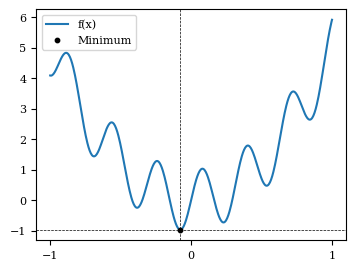

In [5]:
N = 501
xvalues = np.linspace(-1, 1, N)
yvalues = fcn(xvalues)

# Locate the index of the minimum value
imin = np.argmin(yvalues)

# Extract the x and y values at the minimum
xmin = xvalues[imin]
ymin = yvalues[imin]

print(f"Minimum at x = {xmin:.3f}, f(x) = {ymin:.3f}")

plt.plot(xvalues, yvalues, label="f(x)")

# Add dashed lines to indicate the minimum
plt.axvline(xmin, color="black", ls="--", lw=0.5)
plt.axhline(ymin, color="black", ls="--", lw=0.5)

# Add a black point to highlight the minimum
plt.scatter(xmin, ymin, color="black", label="Minimum", s=10, zorder=10)
plt.xticks((-1, 0, 1))
plt.legend()

***
# Exercise 2: Visualizing US business cycles and recessions

In this exercise you are asked to plot two main business cycle indicators, GDP growth and the unemployment rate, for the United States.

1.  Load the data from the CSV file `FRED/FRED_quarterly.csv` located in the repository's `data` folder.

    Familiarize yourself with the data by printing the columns present in the data set and the first 5 rows of data.

    *Hint:* Use `pd.read_csv(..., parse_dates=['DATE'], index_col='DATE')` to automatically parse strings stored in the `DATE` column as dates and set `DATE` as the index.

2.  Compute the quarterly GDP growth (i.e., the relative change of the column `GDP` vs. the previous quarter) in percent.

    *Hint:* This can be achieved using the 
    [`pct_change()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html) method.

3.  Create a figure with two subplots (arranged in 2 rows) which show the GDP growth and the unemployment rate.

    *Hint:* You can construct the graph either using Matplotlib's plotting function or using 
    pandas's
    [`DataFrame.plot`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html).

4.  You want to understand how the business cycle dynamics correspond to the official US recession dates
    as determined by National Bureau of Economic Research (NBER), the agency tasked with dating business 
    cycles in the US.

    Recessions are defined as periods after GDP peaked (the corresponding quarter is stored in the 
    `peak` column) until GDP started growing again (stored in the `trough` column). 

    1.  Load the business cycle dates from `NBER_cycle_dates.csv` located in the `data/` folder.

        Drop all rows where the `peak` date starts before 1948.

        *Hint:* Use `pd.read_csv(..., parse_dates=['peak', 'trough']` to automatically parse strings in the `peak` and `trough`
        columns.

    2.  Loop through all remaining business cycle peak dates and add a vertical line to
        each of the two subplots for GDP growth and unemployment at each date. 
        These lines indicate quartes which were followed by a recession.

    3.  Can you detect any patterns for GDP growth and the unemployment rate after each peak date?

## Solution

#### Part 1: Loading the data

In [6]:
import pandas as pd

# Path to the data directory
DATA_PATH = "../../data/"

# Path to data file
fn = f"{DATA_PATH}/FRED/FRED_quarterly.csv"

# Load the data from the CSV file, parse dates and set the index
df = pd.read_csv(fn, index_col="DATE", parse_dates=["DATE"])

# Inspect columns present in the DataFrame
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 308 entries, 1948-01-01 to 2024-10-01
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      308 non-null    int64  
 1   Quarter   308 non-null    int64  
 2   GDP       308 non-null    float64
 3   CPI       308 non-null    float64
 4   UNRATE    308 non-null    float64
 5   FEDFUNDS  282 non-null    float64
 6   REALRATE  172 non-null    float64
 7   LFPART    308 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 21.7 KB


In [7]:
# Display the first few rows of the DataFrame
df.head(5)

,Year,Quarter,GDP,CPI,UNRATE,FEDFUNDS,REALRATE,LFPART
DATE,,,,,,,,
1948-01-01,1948,1,2239.7,23.7,3.4,NaN,NaN,58.6
1948-04-01,1948,2,2276.7,23.8,3.9,NaN,NaN,59.0
1948-07-01,1948,3,2289.8,24.4,3.6,NaN,NaN,59.3
1948-10-01,1948,4,2292.4,24.3,3.7,NaN,NaN,58.7
1949-01-01,1949,1,2260.8,24.0,4.3,NaN,NaN,58.7


#### Part 2: Compute GDP growth

We use `pct_change()` to compute the relative change from the previous observation. We need to multiply by 100 to convert the growth rate to percent.

In [8]:
# Compute quarterly growth rate of GDP (in percent)
df['GDP_growth'] = df['GDP'].pct_change() * 100

#### Part 3: Plot GDP growth and unemployment

We can use two approaches to visualize the time series for GDP growth and the unemployment rate.
First, we use the pandas plotting functionality, in this case either
[`DataFrame.plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) 
or
[`DataFrame.plot.line()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.line.html)
where the latter simply makes explicit that we intend to plot lines.

Note that we need to pass the options `subplots=True` and `layout=(2,1)` to create two subplots arranged in a two rows,
otherwise pandas places both time series into the same plot.

array([[<Axes: xlabel='DATE', ylabel='Percent (%)'>],
       [<Axes: xlabel='DATE', ylabel='Percent (%)'>]], dtype=object)

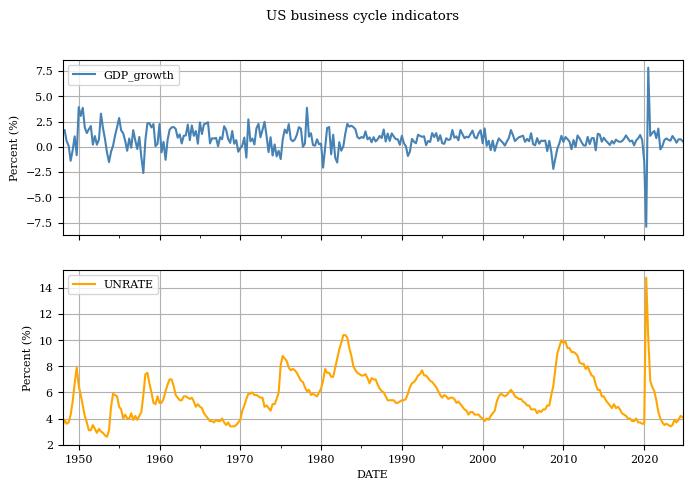

In [9]:
# Plot business cycle indicators using pandas's plotting capabilities
df.plot.line(
    y=['GDP_growth', 'UNRATE'],             # Columns to plot
    figsize=(8, 5),                         # Size of the figure
    subplots=True,                          # Create subplot for each column
    layout=(2, 1),                          # Layout of the subplots
    grid=True,                              # Add grid lines
    ylabel='Percent (%)',                   # Y-axis label
    color=['steelblue', 'orange'],          # Colors for the lines
    title='US business cycle indicators',   # Title of the plot
)

Alternatively, we can create the plot ourselves by directly using Matplotlib's functions.

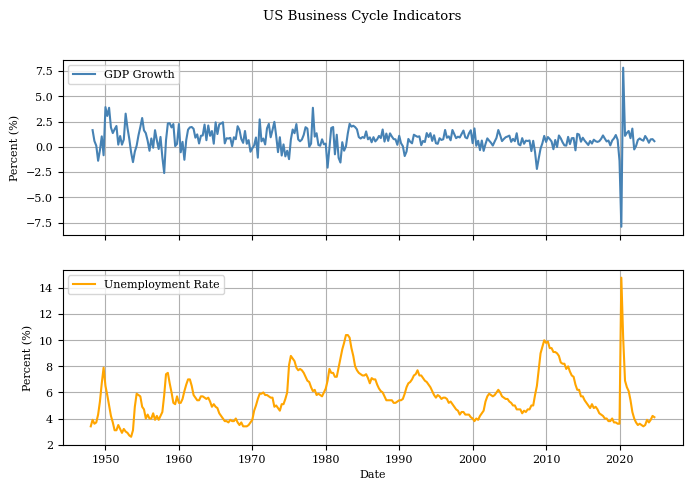

In [10]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(8, 5), sharex=True)

# Plot GDP growth and unemployment rate on separate axes
axes[0].plot(df.index, df['GDP_growth'], label='GDP Growth', color='steelblue')
axes[1].plot(df.index, df['UNRATE'], label='Unemployment Rate', color='orange')
axes[1].set_xlabel('Date')
fig.suptitle('US Business Cycle Indicators')

# Set common options using a loop
for ax in axes:
    ax.set_ylabel('Percent (%)')
    ax.legend()
    ax.grid(True)


#### Part 4: Adding recession indicators

We first load the business cycle data and discard any observations prior to 1948 since our FRED data only starts after that date.

In [11]:
# Path to NBER business cycle dates file
fn = f"{DATA_PATH}/NBER_cycle_dates.csv"

# Load NBER business cycle dates
df_dates = pd.read_csv(fn, parse_dates=['peak', 'trough'])

In [12]:
# Keep only dates after 1948
df_dates = df_dates[df_dates['peak'] >= '1948-01-01']

In [13]:
# Tabulate first five business cycles dates
df_dates.head()

,peak,trough
23,1948-11-01,1949-10-01
24,1953-07-01,1954-05-01
25,1957-08-01,1958-04-01
26,1960-04-01,1961-02-01
27,1969-12-01,1970-11-01


Next, we recreate the plot from above using pandas's plotting functionality. We now save the `axes` array returned by the plotting function since we'll need it later to add the recession indicators. Note that the array returned by `DataFrame.plot.line()` has 2 rows and 1 column, which corresponds to the requested figure layout.

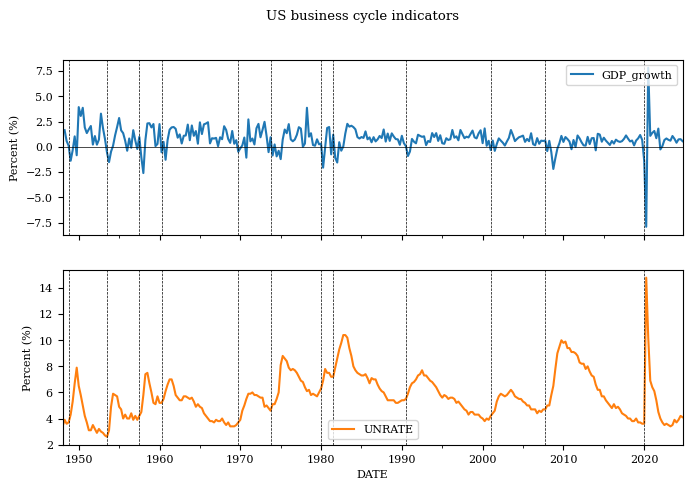

In [14]:
# Recreate the plot from above, save Axes objects
axes = df.plot.line(
    y=["GDP_growth", "UNRATE"],
    figsize=(8, 5),
    subplots=True,
    layout=(2, 1),
    ylabel='Percent (%)',
    title="US business cycle indicators",
)

# Loop through the peak dates and add vertical lines to each subplot
for date in df_dates['peak']:
    # Loop through all subplots in the figure
    for ax in axes[:, 0]:
        # Add a vertical line at the peak date
        ax.axvline(date, color='black', ls='--', lw=0.5)

# Add horizontal line to GDP growth subplot
axes[0, 0].axhline(0, color='black', ls='-', lw=0.5)

As you can clearly see, unemployment starts to increase markedly after each peak quarter as the US economy moves into a recession and hence workers are more likely to lose their job. You can also see that GDP growth turns negative after each peak quarter, which is more or less the definition of a recession.

***
# Exercise 3: Daily returns of US stock market indices

In this exercise, we examine how the three major US stock market indices performed in 2024.
Use the data in `indices.csv` from the folder `../../data/stockmarket` to solve the following tasks:

1.  Load the CSV data and restrict the sample to the calendar year 2024. 

    *Hint:* The data is tab-separated, so you need to specify `sep='\t'` when reading in the data.

    *Hint:* You should use `pd.read_csv(..., parse_dates=['Date'])` to automatically parse strings stored in the `Date` column as dates.

2.  The data comes in a "long" format where each date-ticker combination is stored in 
    a separate row. For the following analysis, the data needs to be reshaped such that each 
    ticker symbol is in its own column ("wide" format).

    Use the [`pivot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html)
    method to reshape the `DataFrame` into the desired form. Consult the 
    [user guide](https://pandas.pydata.org/docs/user_guide/reshaping.html#pivot-and-pivot-table)
    to see a graphical illustration.

    Your pivoted `DataFrame` should look as follows:
    
    |    Ticker	 |   DJIA    | NASDAQ  |  SP500 |
    |------------|-----------|---------|--------|
    | Date		 |           |	       |        |
    | 2024-01-02 |	37715.0	 | 14765.9 | 4742.8 |
    | 2024-01-03 |  37430.2	 | 14592.2 | 4704.8 |
    
3.  Create a line plot which shows the time series for each of the three ticker symbols in a single graph,
    for example using [`DataFrame.plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot).
4.  The graph you just created is not very satisfactory as the three
    indices are recorded on vastly different scales. Express each index
    relative to its initial value in 2024 (so that all three start with the value
    1.0) and recreate the previous graph with this normalized data.
5.  Another way to check whether the three indices are co-moving is to compute and plot their daily returns.
    For each index, compute the daily returns, i.e., the relative change vs. the previous closing price in percent (e.g., using 
    [`pct_change()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html)), 
    and plot the three time series of daily returns in a single graph.
6.  The previous plots suggests that the three indices co-move a lot. 
    
    1.  In order to quantify the strength of 
        this co-movement, compute the pairwise correlations of daily returns using 
        [`corr()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html).

    2.  Create a figure with 3-by-3 subplots where each off-diagonal plot shows the 
        scatter plot for two of the indices.
    
        *Hint:* You can use the function [`scatter_matrix()`](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html) to accomplish this task. Alternatively, you can create a figure with 3-by-3 subplots using Matplotlib's 
        [`subplots()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html), iterate over all rows and columns and add a [`scatter()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) plot to each `axes` object.

    3.  Add the correlation coefficient for each stockmarket index pair 
        as text to the corresponding subplot in the figure you created
        (this can be done using [`text()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html)).

## Solution

#### Part 1: Loading the data

In [15]:
# Uncomment this to use files in the local data/stockmarket directory
DATA_PATH = '../../data/stockmarket'

# Uncomment this to load data directly from GitHub
# DATA_PATH = 'https://raw.githubusercontent.com/richardfoltyn/TECH2-H25/main/data/stockmarket'

In [16]:
import pandas as pd

# path to CSV file
path = f'{DATA_PATH}/indices.csv'

# Parse data using tab character as separator
df = pd.read_csv(path, sep='\t', parse_dates=['Date'])

# Restrict dates to year 2024
df = df.query('Date >= 2024 & Date < 2025')

# Restore default index after dropping other years
df = df.reset_index(drop=True)

In [17]:
# Print first 3 observations
df.head(3)

,Date,Ticker,Price
0,2024-01-02,DJIA,37715.0
1,2024-01-02,SP500,4742.8
2,2024-01-02,NASDAQ,14765.9


In [18]:
# Print last 3 observations
df.tail(3)

,Date,Ticker,Price
750,2024-12-30,DJIA,42573.7
751,2024-12-30,SP500,5906.9
752,2024-12-30,NASDAQ,19486.8


#### Part 2: Reshaping the data with `pivot()`

The values in column `Ticker` should provide the new column names, with values given by the column `Price`. The `Date` column is the (unique) index of the pivoted `DataFrame`.

In [19]:
# Reshape DataFrame, move ticker symbols to individual columns
df = df.pivot(index='Date', columns='Ticker', values='Price')

df.head(5)

Ticker,DJIA,NASDAQ,SP500
Date,,,
2024-01-02,37715.0,14765.9,4742.8
2024-01-03,37430.2,14592.2,4704.8
2024-01-04,37440.3,14510.3,4688.7
2024-01-05,37466.1,14524.1,4697.2
2024-01-08,37683.0,14843.8,4763.5


#### Part 3: Plotting the raw data

<Axes: xlabel='Date', ylabel='Closing price'>

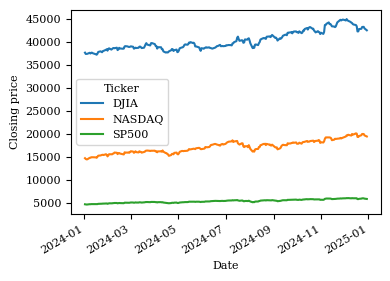

In [20]:
# Plot all three indices, setting a label for the y-axis.
df.plot.line(ylabel='Closing price')

#### Part 4: Plotting the normalized data

One way to normalize each column by its first value is to select the first row and divide the data by this row:

In [21]:
# Use .iloc[0] to select the first row, divide data by values in first row.
df_norm = df / df.iloc[0]

You can use `head()` to verify that the first normalized element of each column is now 1.

In [22]:
df_norm.head(3)

Ticker,DJIA,NASDAQ,SP500
Date,,,
2024-01-02,1.000000,1.000000,1.000000
2024-01-03,0.992449,0.988236,0.991988
2024-01-04,0.992716,0.982690,0.988593


Finally, we plot the normalized indices just like in the previous sub-question. It is now much easier to see that these indices moved very similarly in 2024.

<Axes: xlabel='Date', ylabel='Normalized value'>

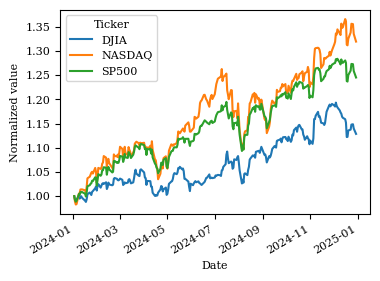

In [23]:
df_norm.plot.line(ylabel='Normalized value')

#### Part 5: Plotting the daily returns

We use the [`pct_change()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html) method to compute the relative difference between two consecutive closing prices.

In [24]:
# Relative difference from previous closing price in percent
df_returns = df.pct_change() * 100.0

Because we cannot compute a difference for the very first observation, this value is set to `NaN`.

In [25]:
df_returns.head(3)

Ticker,DJIA,NASDAQ,SP500
Date,,,
2024-01-02,NaN,NaN,NaN
2024-01-03,-0.755137,-1.176359,-0.801214
2024-01-04,0.026984,-0.561259,-0.342204


We plot the daily returns using the pandas plotting functions as before. The figure confirms that the daily returns for all three indices tend to be very similar.

<Axes: xlabel='Date', ylabel='Daily return in %'>

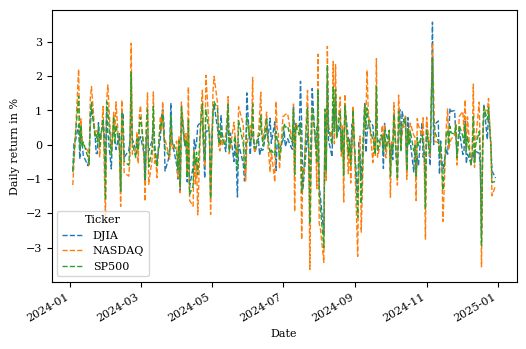

In [26]:
# use dashed lines since daily returns are overlapping
df_returns.plot.line(ylabel='Daily return in %', lw=1.0, ls='--', figsize=(6, 4))

#### Part 6: Scatter plots of daily returns

To compute the pairwise correlation between all columns, we call [`corr()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html). The results show that all three daily returns are highly correlated, which is what we would have expected from looking at the time series of daily returns we plotted earlier.

Note that in all these operations, the `NaN` in the first row are automatically excluded.

In [27]:
df_corr = df_returns.corr()
df_corr

Ticker,DJIA,NASDAQ,SP500
Ticker,,,
DJIA,1.000000,0.660911,0.817880
NASDAQ,0.660911,1.000000,0.958104
SP500,0.817880,0.958104,1.000000


Recall that the correlation coefficient is normalized onto the interval $[-1, 1]$. A positive value means that two variables co-move in the same direction, whereas the opposite is true for a negative value. An absolute value close to 1 means that this co-movement is particularly strong, whereas values around zero mean that there is almost no co-movement.

We can plot the pairwise correlations using the [`scatter_matrix()`](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html) from the module `pandas.plotting` which takes a `DataFrame` as its argument and creates pairwise scatter plots for all columns. The function either plots a histogram or a kernel density plot along the main diagonal, since creating a scatter plot of one and the same variable against itself just yields a diagonal line!

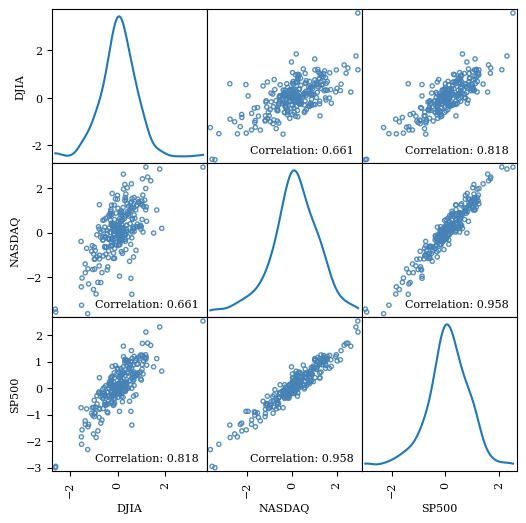

In [28]:
from pandas.plotting import scatter_matrix

# Create figure with 3x3 scatter plots. Main diagonal shows kernel density
# for each index.
axes = scatter_matrix(df_returns, 
        figsize=(6, 6), 
        alpha=0.9, 
        color='none', 
        edgecolors='steelblue', 
        diagonal='kde'
    )

# Iterate over subplots, add correlation text to each off-diagonal panel
for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        # Skip diagonal panels, correlation is 1.0 by construction
        if i == j:
            continue
        # Reference to current Axes object (subplot)
        ax = axes[i, j]
        c = df_corr.iloc[i, j]
        ax.text(0.95, 0.05, f'Correlation: {c:.3f}', 
            transform=ax.transAxes, va='bottom', ha='right'
        )

Alternatively, we can create the 3-by-3 scatter plots manually. We first ask Matplotlib to create a figure with 3-by-3 panels and then iterate over rows and columns, using `ax.scatter()` to add the bivariate scatter plot to each panel.

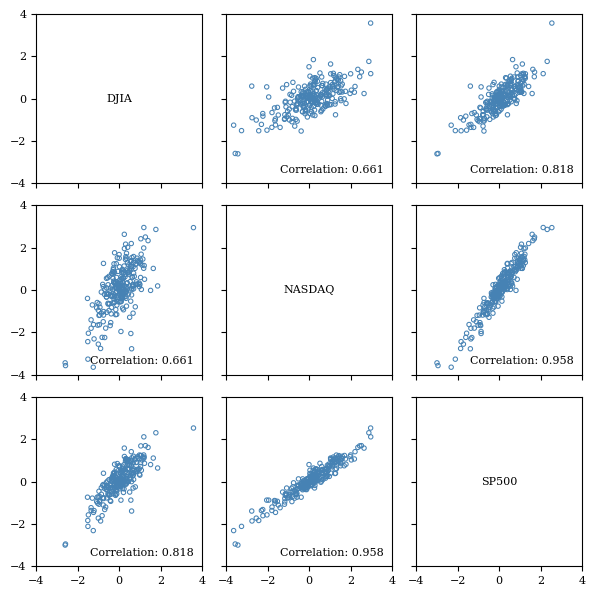

In [29]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(3, 3, figsize=(6, 6), sharex=True, sharey=True)

# Index names used as labels along the diagonal
labels = df_returns.columns.to_list()

# Iterate over rows and columns
for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):

        # Reference to current Axes object (subplot)
        ax = axes[i, j]

        # For diagonal panels, print the index name instead of the
        # (exactly diagonal) scatter plot.
        if i == j:
            ax.text(0.5, 0.5, labels[i], transform=ax.transAxes, 
                va='center', ha='center')
            continue

        # Get x- and y-values for this panel
        xvalues = df_returns.iloc[:, j]
        yvalues = df_returns.iloc[:, i]

        ax.scatter(xvalues, yvalues, s=10, alpha=1.0, lw=0.75,
            color='none', edgecolors='steelblue')

        # Set uniform x- and y-ticks for all axes
        ticks = np.linspace(-4, 4, 5)
        ax.set_xticks(ticks)
        ax.set_yticks(ticks)

        # Add correlation to any off-diagonal graphs
        if i != j:
            c = df_corr.iloc[i, j]
            ax.text(0.95, 0.05, f'Correlation: {c:.3f}', 
                transform=ax.transAxes, va='bottom', ha='right'
            )

# Reduce spacing between subplots
fig.tight_layout()